In [1]:
import psi4
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

In [3]:
psi4.set_output_file('output.dat', False)

PosixPath('output.dat')

In [4]:
%%time

#! Sample HF/cc-pVDZ H2O Computation

psi4.set_memory('500 MB')

h2o = psi4.geometry("""
O
H 1 0.96
H 1 0.96 2 104.5
""")

psi4.energy('scf/cc-pvdz')

CPU times: user 274 ms, sys: 9.1 ms, total: 283 ms
Wall time: 332 ms


-76.0266327350902

In [5]:
%%time

#! Sample UHF/6-31G** CH2 Computation

R = 1.075
A = 133.93

ch2 = psi4.geometry("""
0 3
C
H 1 {0}
H 1 {0} 2 {1}
""".format(R, A)
)

psi4.set_options({'reference': 'uhf'})
psi4.energy('scf/6-31g**')

CPU times: user 258 ms, sys: 9.61 ms, total: 267 ms
Wall time: 360 ms


-38.92533462893707

In [6]:
%%time

psi4.set_options({'reference': 'rhf'})
psi4.optimize('scf/cc-pvdz', molecule=h2o)

Optimizer: Optimization complete!
CPU times: user 746 ms, sys: 13.9 ms, total: 760 ms
Wall time: 766 ms


-76.02703272937481

In [7]:
%%time

scf_e, scf_wfn = psi4.frequency('scf/cc-pvdz', molecule=h2o, return_wfn=True)

CPU times: user 840 ms, sys: 15.6 ms, total: 856 ms
Wall time: 863 ms


In [8]:
%%time

# Example SAPT computation for ethene*ethyne (*i.e.*, ethylene*acetylene).
# Test case 16 from S22 Database

dimer = psi4.geometry("""
0 1
C   0.000000  -0.667578  -2.124659
C   0.000000   0.667578  -2.124659
H   0.923621  -1.232253  -2.126185
H  -0.923621  -1.232253  -2.126185
H  -0.923621   1.232253  -2.126185
H   0.923621   1.232253  -2.126185
--
0 1
C   0.000000   0.000000   2.900503
C   0.000000   0.000000   1.693240
H   0.000000   0.000000   0.627352
H   0.000000   0.000000   3.963929
units angstrom
""")

CPU times: user 1.01 ms, sys: 1e+03 ns, total: 1.01 ms
Wall time: 973 µs


In [9]:
%%time

psi4.set_options({'scf_type': 'df',
                  'freeze_core': True})

psi4.energy('sapt0/jun-cc-pvdz', molecule=dimer)

CPU times: user 3.16 s, sys: 193 ms, total: 3.35 s
Wall time: 3.59 s


-0.0022355823909805178

In [10]:
%%time

#! Example potential energy surface scan and CP-correction for Ne2

ne2_geometry = """
Ne
--
Ne 1 {0}
"""

Rvals = [2.5, 3.0, 4.0]

psi4.set_options({'freeze_core': True})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    ne2 = psi4.geometry(ne2_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=ne2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))

# Prints to output.dat
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))

CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies


          R [Ang]                 E_int [kcal/mol]       
---------------------------------------------------------
            2.5                        0.758605
            3.0                        0.015968
            4.0                        -0.016215
CPU times: user 4.52 s, sys: 1.28 s, total: 5.8 s
Wall time: 6.55 s


In [13]:
#! Example potential energy surface scan and CP-correction for Ne2

argon2_geometry = """
Ar
--
Ar 1 {0}
"""

Rvals = [3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0]
Evals = np.zeros(0)
psi4.set_options({'freeze_core': True})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    ar2 = psi4.geometry(argon2_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=ar2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    Evals = np.append(Evals, e)
    print("            {:3.1f}                        {:1.6f}".format(R, e))


CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies


          R [Ang]                 E_int [kcal/mol]       
---------------------------------------------------------
            3.5                        0.169820
            3.8                        -0.069454
            4.0                        -0.122889
            4.2                        -0.116450
            4.5                        -0.095152
            4.8                        -0.073689
            5.0                        -0.055968
            5.2                        -0.042323
            5.5                        -0.032099
            5.8                        -0.024511
            6.0                        -0.018882


In [14]:
def lj(r,sigma,eps):
    return 4*eps*(((sigma/r)**12) - ((sigma/r)**6))

In [15]:
popt, pcov = curve_fit(lj, Rvals, Evals)
epsilon_fit, sigma_fit = popt
y_fit = lj(Rvals, epsilon_fit, sigma_fit)

In [16]:
print(epsilon_fit)
print(sigma_fit)

3.6433941616648395
0.12032435999897775


In [17]:
print(y_fit)
print(Evals)

[ 0.16682948 -0.0643247  -0.11789446 -0.11521038 -0.09738478 -0.078054
 -0.06126374 -0.04775852 -0.03723337 -0.02913303 -0.02291952]
[ 0.16982018 -0.06945424 -0.12288899 -0.11644979 -0.09515185 -0.07368919
 -0.05596805 -0.04232286 -0.03209929 -0.02451139 -0.01888219]


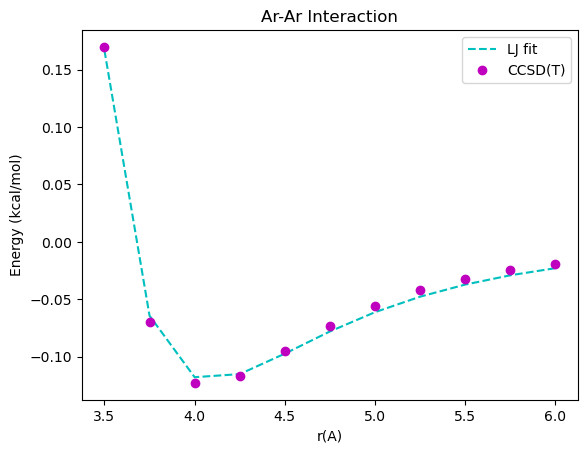

In [19]:
plt.plot(Rvals, y_fit, 'c--', label="LJ fit")
plt.plot(Rvals, Evals, 'o', color="m", label="CCSD(T)")
plt.xlabel("r(A)")
plt.ylabel("Energy (kcal/mol)")
plt.title("Ar-Ar Interaction")
plt.legend()
plt.savefig("../Figures/Ar-Ar_LJfit.png", dpi=300, bbox_inches="tight")